# Data Visualization (Hybrid)

Most of the following code is taken from the following tutorial

Ref:-https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

Importing libraries

In [12]:
import numpy as np  
import pandas as pd 
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

Loading data

In [13]:
malwarelist=np.genfromtxt('n_final_hybrid_full_train.csv',delimiter=",",dtype=str)

X = malwarelist[:,0:-2]

y = malwarelist[:,-1]

Assigning names to their fields

In [14]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)

df['y'] = y

df['label'] = df['y'].apply(lambda i: str(i))

X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (8150, 136)


Implementing PCA

In [15]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.35777221 0.16117449 0.10763651]


Plotting graph using two PCA components

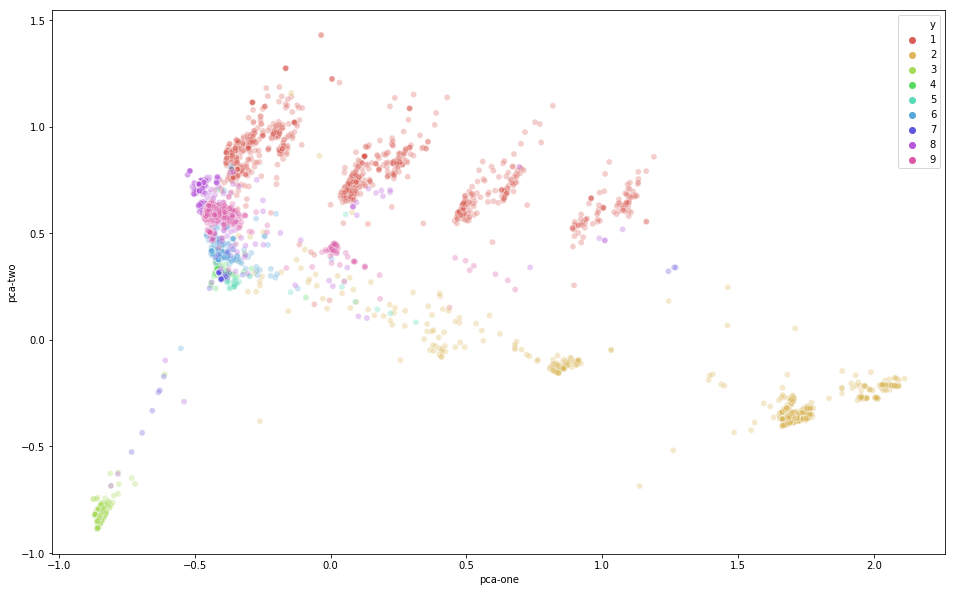

In [16]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 9),
    data=df,
    legend="full",
    alpha=0.3
)

Copying data

In [17]:
df_copy = df.copy()
data_set = df_copy[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_set)
df_copy['pca-one'] = pca_result[:,0]
df_copy['pca-two'] = pca_result[:,1] 
df_copy['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.35777221 0.16117449 0.10763651]


Applying t-SNE fro data visualization

In [18]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df[feat_cols].values)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8150 samples in 0.025s...
[t-SNE] Computed neighbors for 8150 samples in 4.570s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8150
[t-SNE] Computed conditional probabilities for sample 2000 / 8150
[t-SNE] Computed conditional probabilities for sample 3000 / 8150
[t-SNE] Computed conditional probabilities for sample 4000 / 8150
[t-SNE] Computed conditional probabilities for sample 5000 / 8150
[t-SNE] Computed conditional probabilities for sample 6000 / 8150
[t-SNE] Computed conditional probabilities for sample 7000 / 8150
[t-SNE] Computed conditional probabilities for sample 8000 / 8150
[t-SNE] Computed conditional probabilities for sample 8150 / 8150
[t-SNE] Mean sigma: 0.002884
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.656963
[t-SNE] Error after 300 iterations: 1.625591
t-SNE done! Time elapsed: 41.050331592559814 seconds


Plotting t-SNE graph using two component

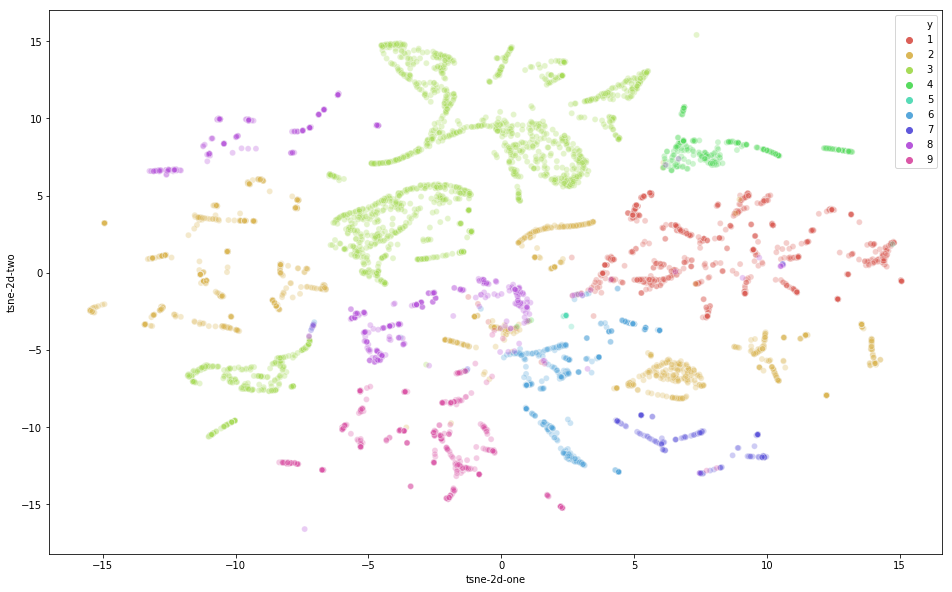

In [19]:
df_copy['tsne-2d-one'] = tsne_results[:,0]
df_copy['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 9),
    data=df_copy,
    legend="full",
    alpha=0.3
)